## Image classification with Convolutional Neural Networks - Resnet-34

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np


In [4]:
PATH = "data/plants/"
sz=224 #size that the images will be resized to in order to ensure that the training runs quickly
#bs=28

The dataset is available at https://github.com/salathegroup/plantvillage_deeplearning_paper_dataset. 

## First look at healthy plants pictures

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize .

In [5]:
os.listdir(PATH)

['README.md',
 '.git',
 'valid',
 'models',
 'Tomato_Healthy.zip',
 'train',
 'tmp',
 'Tomato_Unhealthy.zip',
 'validation.zip']

In [6]:
os.listdir(f'{PATH}valid')

['Tomato_Unhealthy', 'Tomato_Healthy']

In [7]:
files = os.listdir(f'{PATH}valid/Tomato_Unhealthy')[:10]
files



['0c3153b2-0e64-41b6-902a-66eafbf7cae6___GHLB Leaf 4.1 Day 1.JPG',
 '0ed6d8f5-dd9f-4f1d-a33d-2f556be12a27___UF.GRC_BS_Lab Leaf 0291.JPG',
 '0ab391bd-e5ba-479c-919b-3aa9a94f66db___GHLB2 Leaf 8934.JPG',
 '0b29fe6c-b8da-4a5e-b94a-79b0b42fd905___UF.GRC_YLCV_Lab 01813.JPG',
 '0ead4ae7-b14a-4f00-862b-f8ca126136ec___GHLB2 Leaf 89.2.JPG',
 '0ee63bfa-d01f-4adb-b954-924f271a4d4f___Crnl_L.Mold 9022.JPG',
 '0bae0514-799a-479f-a407-ad763f458916___Crnl_L.Mold 8989.JPG',
 '0db2eb04-b52c-4df9-9b3d-17bf58f03bc3___UF.GRC_YLCV_Lab 02967.JPG',
 '0e3ded7b-0b9e-4c11-9db7-38eba7e0bdb2___GCREC_Bact.Sp 3598.JPG',
 '0b494c44-8cd0-4491-bdfd-8a354209c3ae___RS_Erly.B 9561.JPG']

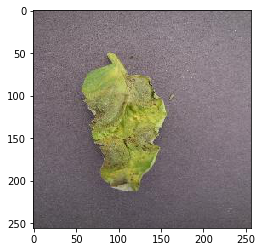

In [8]:
img = plt.imread(f'{PATH}valid/Tomato_Unhealthy/{files[2]}')
plt.imshow(img);

Here is how the raw data looks like

In [9]:
img.shape

(256, 256, 3)

In [10]:
img[:4,:4]

array([[[103,  92,  98],
        [119, 108, 114],
        [129, 118, 124],
        [120, 109, 115]],

       [[110,  99, 105],
        [110,  99, 105],
        [106,  95, 101],
        [104,  93,  99]],

       [[119, 108, 114],
        [110,  99, 105],
        [100,  89,  95],
        [100,  89,  95]],

       [[116, 105, 111],
        [114, 103, 109],
        [110,  99, 105],
        [107,  96, 102]]], dtype=uint8)

## The model 

I am going to use a <b>pre-trained</b> [resnet model](https://github.com/KaimingHe/deep-residual-networks).

In [12]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy                 
    0      0.255147   0.086431   0.9575    
    1      0.151301   0.087939   0.965                     



[array([0.08794]), 0.965]

## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [13]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [14]:
# from here we know that 'healthy' is label 0 and 'unhealthy' is label 1.
data.classes

['Tomato_Healthy', 'Tomato_Unhealthy']

In [15]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(400, 2)

In [16]:
log_preds[:10]

array([[-0.03756, -3.3005 ],
       [-0.05068, -3.00746],
       [-0.04078, -3.21987],
       [-0.00069, -7.27716],
       [-0.21477, -1.64366],
       [-0.00051, -7.57135],
       [-0.00142, -6.55537],
       [-0.00553, -5.20025],
       [-0.00031, -8.07581],
       [-0.00379, -5.57718]], dtype=float32)

In [17]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        

In [18]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [19]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [20]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [21]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


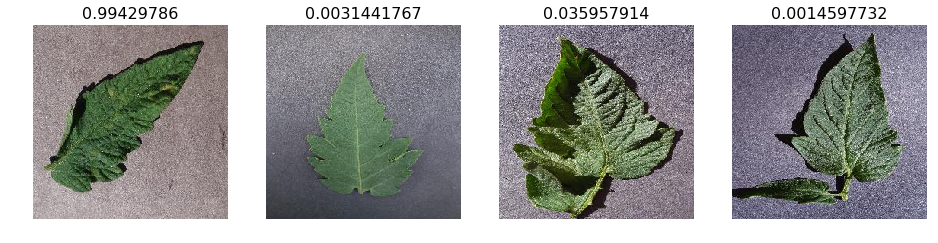

In [22]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


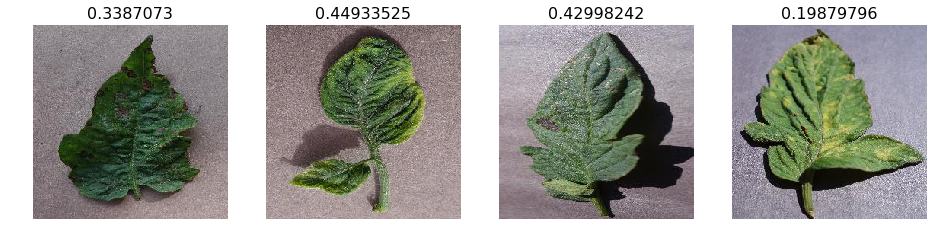

In [23]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [24]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct healthy plant


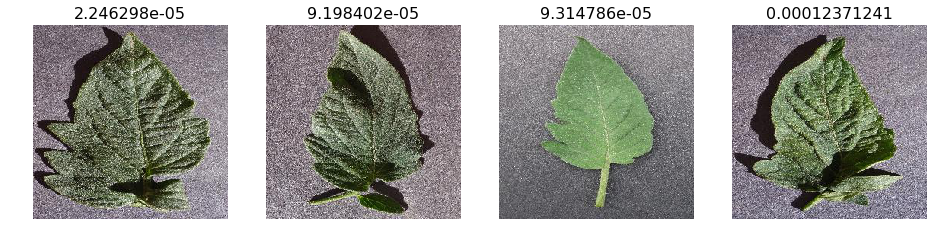

In [25]:
plot_val_with_title(most_by_correct(0, True), "Most correct healthy plant")

Most correct unhealthy plant


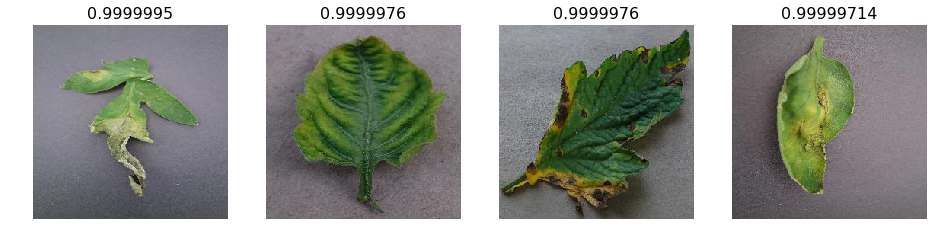

In [26]:
plot_val_with_title(most_by_correct(1, True), "Most correct unhealthy plant")

Most incorrect healthy plant


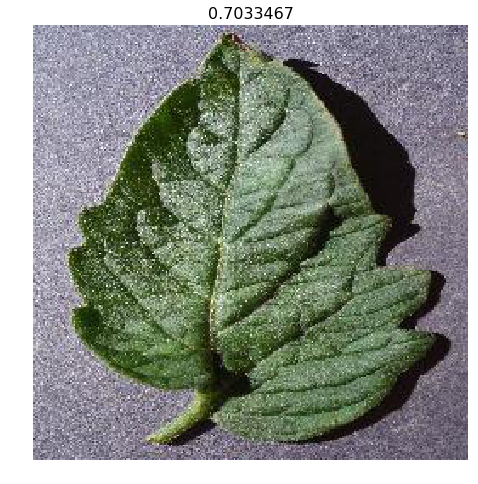

In [27]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect healthy plant")

Most incorrect unhealthy plant


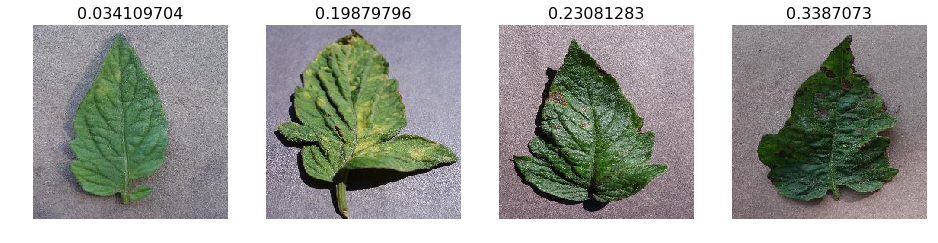

In [28]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect unhealthy plant")

Most uncertain predictions


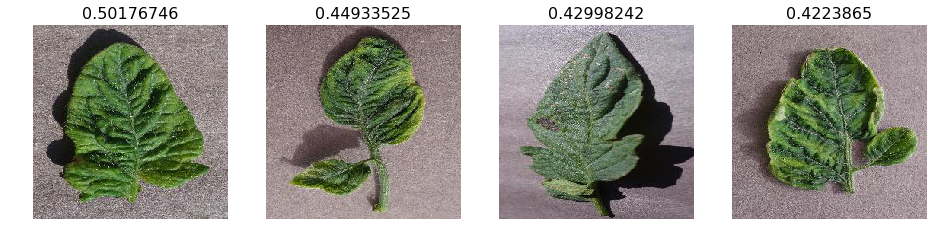

In [29]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

In [30]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [31]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy                  
    0      1.145062   348.992284 0.81      



Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

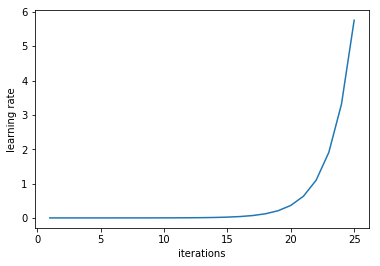

In [32]:
learn.sched.plot_lr()

It is possible to see the plot of loss versus learning rate to see where the loss stops decreasing:

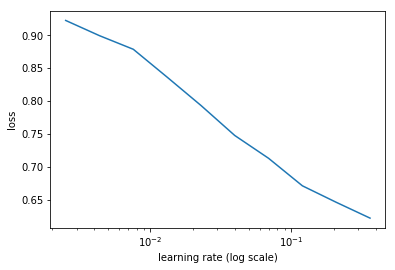

In [33]:
learn.sched.plot()

The loss is still clearly improving at lr=1e-2 (0.01), so that's what I use. 

## Improving the model

### Data augmentation

If I try training for more epochs, the model will start to *overfit*, learning to recognize the specific images in the training set, rather than generalizing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

In [34]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [35]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [36]:
ims = np.stack([get_augs() for i in range(6)])

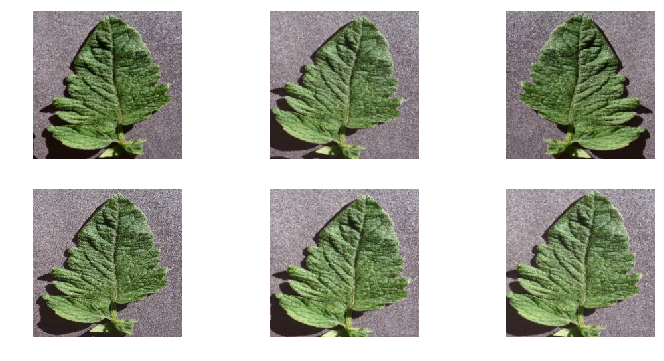

In [37]:
plots(ims, rows=2)

Let's create a new `data` object that includes this augmentation in the transforms.

In [38]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [39]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                 
    0      0.239657   0.077608   0.97      



[array([0.07761]), 0.97]

In [40]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [41]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      0.092465   0.091541   0.9625    
    1      0.074526   0.098928   0.96                       
    2      0.067406   0.074036   0.97                       



[array([0.07404]), 0.97]

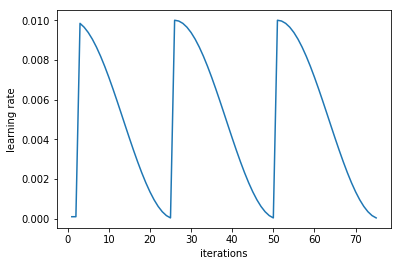

In [42]:
learn.sched.plot_lr()

Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.

Since we've got a pretty good model at this point, we might want to save it so we can load it again later without training it from scratch.

In [43]:
learn.save('224_lastlayer_plant')

In [44]:
learn.load('224_lastlayer_plant')

### Fine-tuning and differential learning rate annealing

Now that we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) `unfreeze()`.

In [45]:
learn.unfreeze()

Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before. We refer to this as *differential learning rates*, although there's no standard name for this techique in the literature that we're aware of.

In [46]:
lr=np.array([1e-4,1e-3,1e-2])

In [47]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.133466   0.05497    0.975     
    1      0.0676     0.029549   0.99                       
    2      0.043237   0.017789   0.995                      
    3      0.030888   0.016984   0.995                      
    4      0.02128    0.013407   0.995                      
    5      0.018115   0.015131   0.995                      
    6      0.01489    0.012426   0.995                      



[array([0.01243]), 0.995]

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

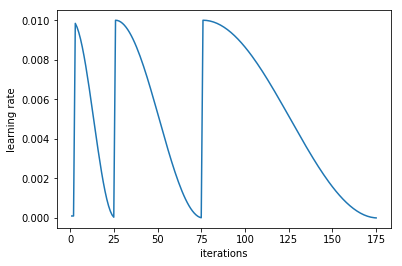

In [48]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [49]:
learn.save('224_all_plants')

In [50]:
learn.load('224_all_plants')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [51]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [52]:
accuracy_np(probs, y)

0.9975

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [53]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[200   0]
 [  1 199]]


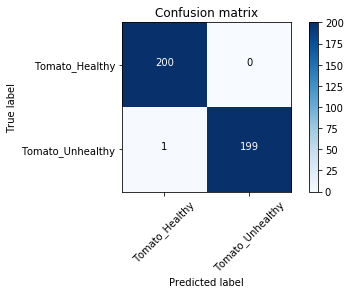

In [55]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

In [56]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect healthy plants")

Most incorrect healthy plants


<Figure size 1152x576 with 0 Axes>

Most incorrect unhealthy plants


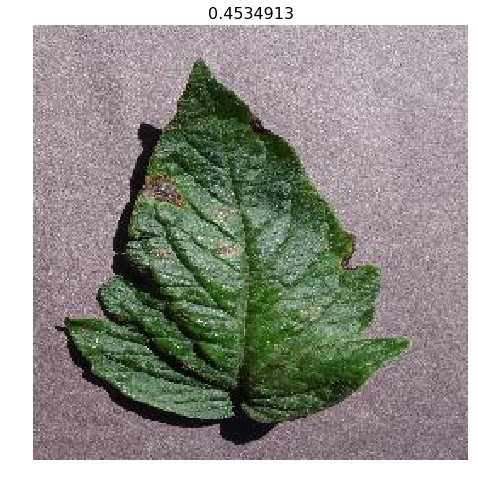

In [57]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect unhealthy plants")

## Review: easy steps to train a world-class image classifier

1. Enable data augmentation, and precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## Understanding the code for our first model

**tfms** stands for *transformations*. `tfms_from_model` takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1)), and more.

In [58]:
tfms = tfms_from_model(resnet34, sz)

We need a <b>path</b> that points to the dataset. In this path we will also store temporary data and final results. `ImageClassifierData.from_paths` reads data from a provided path and creates a dataset ready for training.

In [59]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

`ConvLearner.pretrained` builds *learner* that contains a pre-trained model. The last layer of the model needs to be replaced with the layer of the right dimensions. The pretained model was trained for 1000 classes therefore the final layer predicts a vector of 1000 probabilities. The model for plants needs to output a two dimensional vector. The diagram below shows in an example how this was done in one of the earliest successful CNNs. The layer "FC8" here would get replaced with a new layer with 2 outputs.

<img src="images/pretrained.png" width="500">
[original image](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

In [60]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

*Parameters*  are learned by fitting a model to the data. *Hyparameters* are another kind of parameter, that cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Two examples of hyperparameters are the *learning rate* and the *number of epochs*.

During iterative training of a neural network, a *batch* or *mini-batch* is a subset of training samples used in one iteration of Stochastic Gradient Descent (SGD). An *epoch* is a single pass through the entire training set which consists of multiple iterations of SGD.

We can now *fit* the model; that is, use *gradient descent* to find the best parameters for the fully connected layer we added, that can separate helathy pictures from unhealthy pictures. We need to pass two hyperameters: the *learning rate* (generally 1e-2 or 1e-3 is a good starting point, we'll look more at this next) and the *number of epochs* (you can pass in a higher number and just stop training when you see it's no longer improving, then re-run it with the number of epochs you found works well.)

In [61]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.230269   0.125028   0.96      



[array([0.12503]), 0.96]

## Analyzing results: loss and accuracy

When we run `learn.fit` we print 3 performance values (see above.) Here 0.03 is the value of the **loss** in the training set, 0.0226 is the value of the loss in the validation set and 0.9927 is the validation accuracy. What is the loss? What is accuracy? Why not to just show accuracy?

**Accuracy** is the ratio of correct prediction to the total number of predictions.

In machine learning the **loss** function or cost function is representing the price paid for inaccuracy of predictions.

The loss associated with one example in binary classification is given by:
`-(y * log(p) + (1-y) * log (1-p))`
where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1.